In [3]:
import sys
sys.path.insert(0, '/Users/kedzie/Documents/Berkeley/notebooks/utilities')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections.abc import Iterable

from utility_functions.utils import * #read_data, read_press, getnearpos, folder_files, headspace
from matplotlib import rcParams as rc

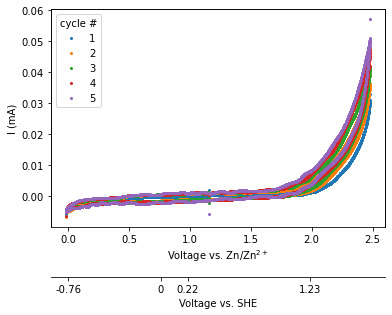

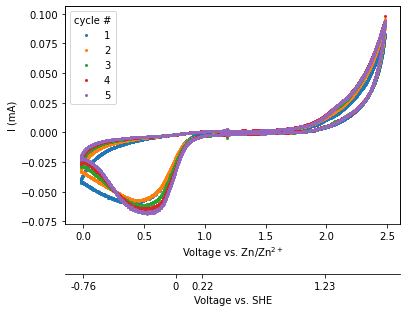

In [140]:

def plot_cv_zn(cv_file, metal='zn', pressure=None):
    
    cv_file['Ewe/V']+=0.98
    x=cv_file['Ewe/V']
    
    num_cycles = pd.unique(cv_file['cycle number'])
    fig, ax = plt.subplots()
    ax3 = ax.twiny()
    for i in num_cycles:
        df = cv_file.loc[cv_file['cycle number'] == i]
        ax.plot(df['Ewe/V'], df['<I>/mA'], 'o', markersize=2, label= str(int(i)))
    #ax.set_ylim(-0.12, -0.04)
    #ax.set_xlim(-1.2, 0)


    #plt.plot(cv_zn[1]['<Ece>/V'], cv_zn[1]['<I>/mA'])
    ax.legend(title = 'cycle #')

    ax.set_xlabel ('Voltage vs. Zn/Zn$^{2+}$') #AgCl/Ag')
    ax.set_ylabel ('I (mA)')

    she_axis = [-1, -0.76, 0, 0.22, 1.23, 2, 3]
    newpos = [x+0.76 for x in she_axis]

    ax3.set_xticks(newpos)
    ax3.set_xticklabels(she_axis)
    ax3.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
    ax3.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
    ax3.spines['bottom'].set_position(('outward', 50))
    ax3.set_xlabel('Voltage vs. SHE')
    ax3.set_xlim(ax.get_xlim())
    
    #ax2 = ax.twiny()
#     axis_labels = [0,1]
#     zn_conversion = [x-0.98 for x in axis_labels]
#     ax2.set_xticks(zn_conversion)
#     ax2.set_xticklabels(axis_labels)
#     ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
#     ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
#     ax2.spines['bottom'].set_position(('outward',100))
#     ax2.set_xlabel('Voltage vs. Zn/Zn$^{2+}$')
    
    #if pressure:
        #find time at start of the CV
    if not isinstance(pressure,pd.DataFrame):
        pass
    else:
        st1=cv_file['time/s'].iloc[0]
        #determine start and end indices in pressure df for discharge and charge
        st_p1 = getnearpos(pressure['time/s'],st1)

        temp = pressure['temperature/C']+273
        channel = 1
        umoles = pressure['pressure/torr']/760*headspace(channel)/temp/0.082057
        umoles = umoles-umoles.iloc[0]

        fig2,ax4 = plt.subplots()
        ax5= ax4.twinx()
        ax4.plot(pressure['time/s']/60, umoles, 'o', color='orange')
        ax5.plot(cv_file['time/s']/60 ,cv_file['<I>/mA'])
        ax4.set_xlabel('Time (min)')
        ax4.set_ylabel('Moles of Gas ($\mu$ mol)')
        ax5.set_ylabel('I (mA)')


        plt.show()

    return    

# initial_zn_test = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220708_Zn_3_electrode_test_CV/')
# plot_cv_zn(initial_zn_test[1])



# cv_rpt_znotf= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220713_Zn_3electrodecell_CV/')
# plot_cv_zn(cv_rpt_znotf[1])
# #plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220713_Zn_3electrodecell_CV/220713_Zn_3electrodecell_CV.png', transparent = True, dpi=600, bbox_inches='tight')


    
# cv_naotf_zn = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220713_Zn_NaOTf_3electrode_CV_EIS/')
# plot_cv_zn(cv_naotf_zn[3])
# #plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220713_Zn_NaOTf_3electrode_CV_EIS/220713_Zn_NaOTf_3electrode_CV_EIS.png', transparent = True, dpi=600, bbox_inches='tight')



cv_znotf2_argon = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220714_Zn_3electrode_CV_EIS_Argon/')
cv_znotf2_ar_p = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220714_Zn_3electrode_CV_EIS_Argon/220714_Zn_3electrode_CV_EIS_Argon_p_Ch1__2022-07-14_12.04_43.txt')
plot_cv_zn(cv_znotf2_argon[3]) #argon
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220714_Zn_3electrode_CV_EIS_Argon/220714_Zn_3electrode_CV_EIS_Argon_2.png', transparent = True, dpi=600, bbox_inches='tight')


cv_znotf2_o2_p = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220714_Zn_3electrode_CV_EIS_Argon/220714_Zn_3electrode_CV_EIS_O2_rpt_p_Ch1__2022-07-14_13.53_53.txt')
plot_cv_zn(cv_znotf2_argon[8]) #subsequent oxygen cycle
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220714_Zn_3electrode_CV_EIS_Argon/220714_Zn_3electrode_CV_O2.png', transparent = True, dpi=600, bbox_inches='tight')




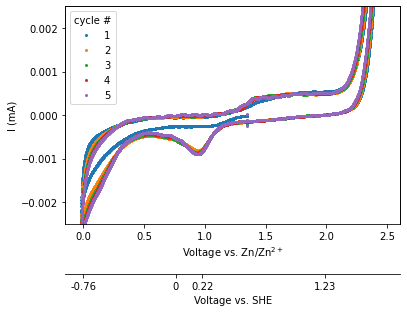

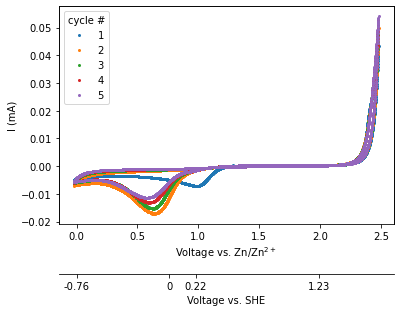

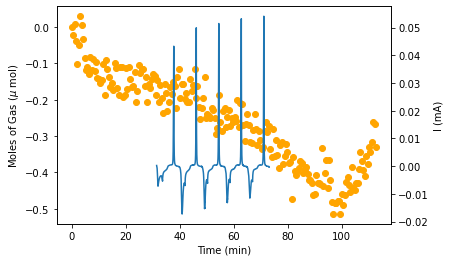

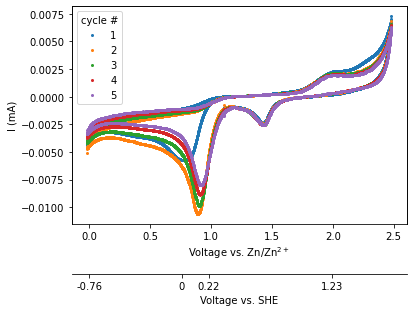

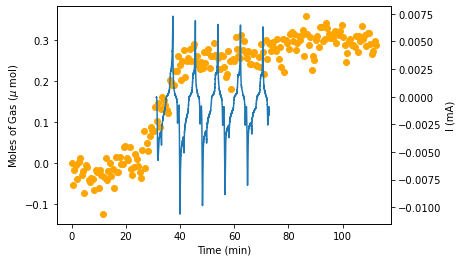

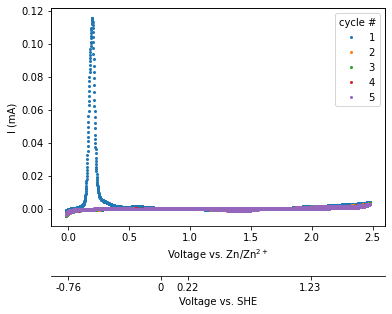

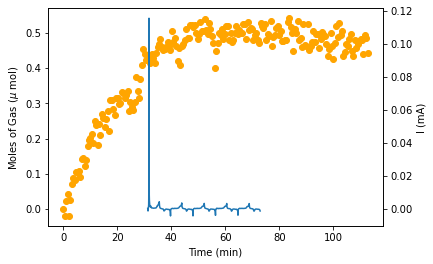

In [146]:
cv_znotf2_pt_ar = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220819_Zn_3electrode_CV_EIS_Ar_Pt/')
cv_znotf2_pt_ar_p = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220819_Zn_3electrode_CV_EIS_Ar_Pt/220819_Zn_3electrode_CV_EIS_Ar_Pt_p_Ch1__2022-08-19_16.44_55.txt')
plot_cv_zn(cv_znotf2_pt_ar[3]) #, pressure = cv_znotf2_pt_ar_p)
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220819_Zn_3electrode_CV_EIS_Ar_Pt/220819_Zn_3electrode_CV_EIS_Ar_Pt.png', transparent = True, dpi=600, bbox_inches='tight')
plt.ylim(-0.0025,0.0025)


cv_znotf2_pt_o2 = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220819_Zn_3electrode_CV_EIS_O2_Pt/')
cv_znotf2_pt_o2_p = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220819_Zn_3electrode_CV_EIS_O2_Pt/220819_Zn_3electrode_CV_EIS_O2_Pt_p_Ch1__2022-08-19_18.33_22.txt')
plot_cv_zn(cv_znotf2_pt_o2[3], pressure = cv_znotf2_pt_o2_p)
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220819_Zn_3electrode_CV_EIS_O2_Pt/220819_Zn_3electrode_CV_EIS_O2_Pt.png', transparent = True, dpi=600, bbox_inches='tight')


cv_znotf2_au_o2 = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220822_Zn_3electrode_CV_EIS_O2_Au/')
cv_znotf2_au_o2_p = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220822_Zn_3electrode_CV_EIS_O2_Au/220822_Zn_3electrode_CV_EIS_O2_Au_p_Ch1__2022-08-22_12.50_41.txt')
plot_cv_zn(cv_znotf2_au_o2[3], pressure = cv_znotf2_au_o2_p)
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220822_Zn_3electrode_CV_EIS_O2_Au/220822_Zn_3electrode_CV_EIS_O2_Au.png', transparent = True, dpi=600, bbox_inches='tight')


cv_znotf2_au_ar = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220820_Zn_3electrode_CV_EIS_Ar_Au/')
cv_znotf2_au_ar_p = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220820_Zn_3electrode_CV_EIS_Ar_Au/220820_Zn_3electrode_CV_EIS_Ar_Au_pressure.txt')
plot_cv_zn(cv_znotf2_au_ar[3], pressure = cv_znotf2_au_ar_p)


#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220820_Zn_3electrode_CV_EIS_Ar_Au/220820_Zn_3electrode_CV_EIS_Ar_Au.png', transparent = True, dpi=600, bbox_inches='tight')


#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220820_Zn_3electrode_CV_EIS_Ar_Au/220820_Zn_3electrode_CV_EIS_Ar_Au_zoomed.png', transparent = True, dpi=600, bbox_inches='tight')




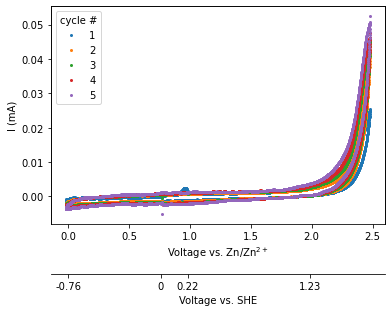

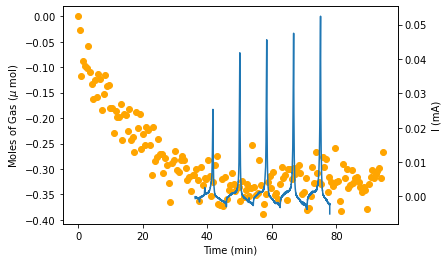

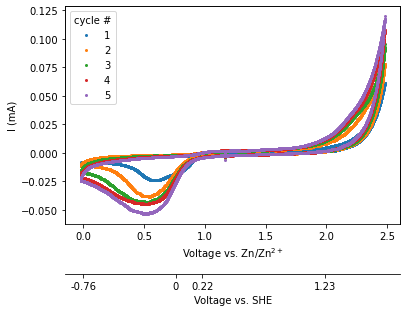

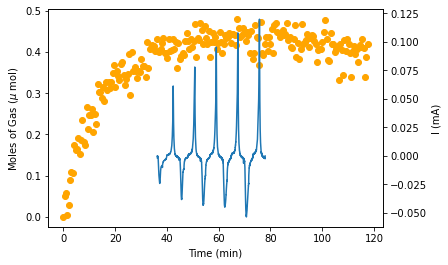

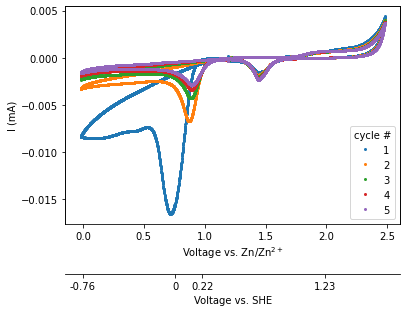

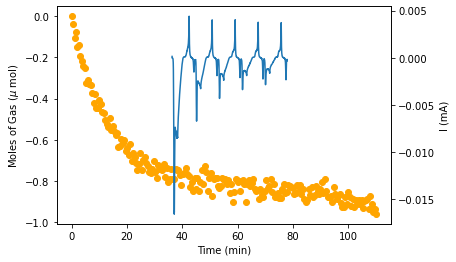

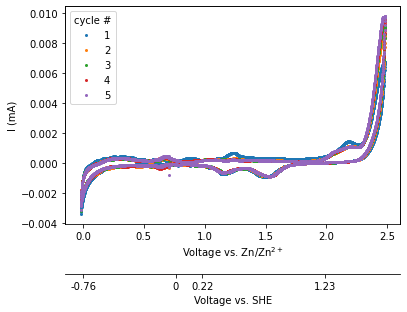

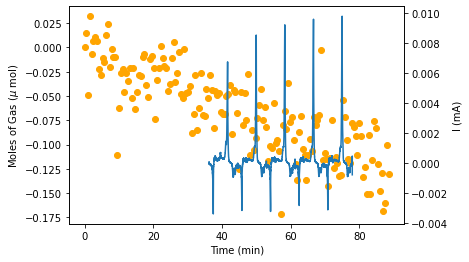

In [129]:
cv_znso4_gc_ar = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220822_ZnSO4_3electrode_CV_EIS_GC_Ar/')#plot_cv_zn(cv_znso4_gc_ar[3])
cv_znso4_gc_ar_p = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220822_ZnSO4_3electrode_CV_EIS_GC_Ar/220822_ZnSO4_3electrode_CV_EIS_GC_Ar_p_Ch1__2022-08-22_15.27_25.txt')
plot_cv_zn(cv_znso4_gc_ar[3], pressure = cv_znso4_gc_ar_p)


#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220822_ZnSO4_3electrode_CV_EIS_GC_Ar/220822_ZnSO4_3electrode_CV_EIS_GC_Ar.png', transparent = True, dpi=600, bbox_inches='tight')

cv_znso4_gc_o2 = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220822_ZnSO4_3electrode_CV_EIS_GC_O2/')
cv_znso4_gc_o2_p = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220822_ZnSO4_3electrode_CV_EIS_GC_O2/220822_ZnSO4_3electrode_CV_EIS_GC_O2_p_Ch1__2022-08-22_17.15_00.txt')
plot_cv_zn(cv_znso4_gc_o2[3], pressure = cv_znso4_gc_o2_p)

#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220822_ZnSO4_3electrode_CV_EIS_GC_O2/220822_ZnSO4_3electrode_CV_EIS_GC_O2.png', transparent = True, dpi=600, bbox_inches='tight')

cv_znso4_au_o2 =folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220823_ZnSO4_3electrode_CV_EIS_Au_O2/')
cv_znso4_au_o2_p = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220823_ZnSO4_3electrode_CV_EIS_Au_O2/220823_ZnSO4_3electrode_CV_EIS_Au_O2_p.txt')
plot_cv_zn(cv_znso4_au_o2[3], pressure = cv_znso4_au_o2_p)
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220823_ZnSO4_3electrode_CV_EIS_Au_O2/220823_ZnSO4_3electrode_CV_EIS_Au_O2.png', transparent = True, dpi=600, bbox_inches='tight')


cv_znso4_au_ar =folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220823_ZnSO4_3electrode_CV_EIS_Au_Ar/')
cv_znso4_au_ar_p =read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220823_ZnSO4_3electrode_CV_EIS_Au_Ar/220823_ZnSO4_3electrode_CV_EIS_Au_Ar_Ch1__2022-08-23_14.13_08.txt')

plot_cv_zn(cv_znso4_au_ar[3], pressure=cv_znso4_au_ar_p)
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220823_ZnSO4_3electrode_CV_EIS_Au_Ar/220823_ZnSO4_3electrode_CV_EIS_Au_Ar.png', transparent = True, dpi=600, bbox_inches='tight')



cv_znso4_pt_o2=folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220823_ZnSO4_3electrode_CV_EIS_Pt_O2/')
cv_znso4_pt_o2_p=read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220823_ZnSO4_3electrode_CV_EIS_Pt_O2/220823_ZnSO4_3electrode_CV_EIS_Pt_O2_p_Ch1__2022-08-23_12.02_57.txt')

#plot_cv_zn(cv_znso4_pt_o2[3], pressure=cv_znso4_pt_o2_p)
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220823_ZnSO4_3electrode_CV_EIS_Pt_O2/220823_ZnSO4_3electrode_CV_EIS_Pt_O2.png', transparent = True, dpi=600, bbox_inches='tight')

cv_znso4_pt_ar=folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220823_ZnSO4_3electrode_CV_EIS_Pt_Ar/')
cv_znso4_pt_ar_p=read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220823_ZnSO4_3electrode_CV_EIS_Pt_Ar/220823_ZnSO4_3electrode_CV_EIS_Pt_Ar_p_Ch1__2022-08-23_16.04_07.txt')
#plot_cv_zn(cv_znso4_pt_ar[3], pressure= cv_znso4_pt_ar_p)
#plt.ylim(-0.005,0.005)
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220823_ZnSO4_3electrode_CV_EIS_Pt_Ar/220823_ZnSO4_3electrode_CV_EIS_Pt_Ar_zoomed.png', transparent = True, dpi=600, bbox_inches='tight')





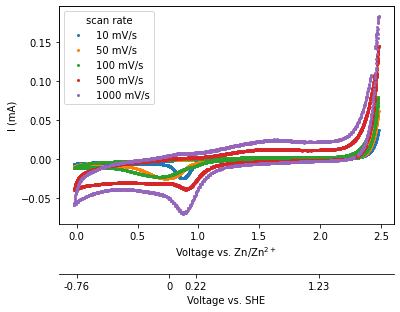

In [174]:
#scan rate dependence study!!
gc_so4_cv_scan = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220825_ZnSO4_CV_scanratedependence_GC_O2/')
# plot_cv_zn(gc_so4_cv_scan[3])
# plot_cv_zn(gc_so4_cv_scan[4])
# plot_cv_zn(gc_so4_cv_scan[5])
# plot_cv_zn(gc_so4_cv_scan[6])

gold_so4_cv_scan = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220825_ZnSO4_CV_scanratedependence_Au_O2/')

# plot_cv_zn(gold_so4_cv_scan[3])
# plot_cv_zn(gold_so4_cv_scan[4])
# plot_cv_zn(gold_so4_cv_scan[5])
# plot_cv_zn(gold_so4_cv_scan[6])


pt_so4_cv_scan = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220825_ZnSO4_CV_scanratedependence_Pt_O2/')
# plot_cv_zn(pt_so4_cv_scan[3]) #10
# plot_cv_zn(pt_so4_cv_scan[4])# 50
# plot_cv_zn(pt_so4_cv_scan[5]) #100
# plot_cv_zn(pt_so4_cv_scan[6]) #500
# plot_cv_zn(pt_so4_cv_scan[7]) 



def plt_cv_scanrates (cv_file):
    
    x=cv_file[0]['Ewe/V']
    
    #num_cycles = pd.unique(cv_file['cycle number'])
    fig, ax = plt.subplots()
    ax3 = ax.twiny()
    scanrates = [10, 50, 100, 500, 1000]
    for i in range(len(cv_file)):
        cv_file[i]['Ewe/V']+=0.98
        ax.plot(cv_file[i]['Ewe/V'].loc[cv_file[i]['cycle number'] == 2], cv_file[i]['<I>/mA'].loc[cv_file[i]['cycle number'] == 2], 'o', markersize=2, label= str(scanrates[i])+ ' mV/s')
    #ax.set_ylim(-0.12, -0.04)
    #ax.set_xlim(-1.2, 0)


    #plt.plot(cv_zn[1]['<Ece>/V'], cv_zn[1]['<I>/mA'])
    ax.legend(title = 'scan rate')

    ax.set_xlabel ('Voltage vs. Zn/Zn$^{2+}$') #AgCl/Ag')
    ax.set_ylabel ('I (mA)')

    she_axis = [-1, -0.76, 0, 0.22, 1.23, 2, 3]
    newpos = [x+0.76 for x in she_axis]

    ax3.set_xticks(newpos)
    ax3.set_xticklabels(she_axis)
    ax3.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
    ax3.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
    ax3.spines['bottom'].set_position(('outward', 50))
    ax3.set_xlabel('Voltage vs. SHE')
    ax3.set_xlim(ax.get_xlim())
    
plt_cv_scanrates(pt_so4_cv_scan[3:8])
plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220825_ZnSO4_CV_scanratedependence_Pt_O2/220825_ZnSO4_Pt_O2_CVs.png', dpi=600)

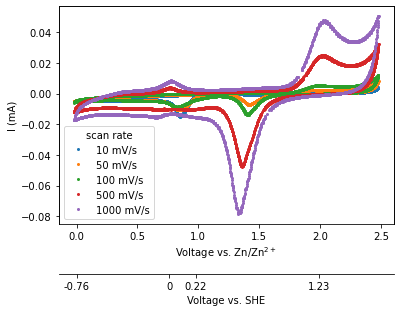

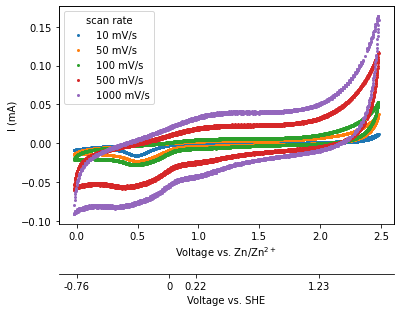

In [171]:
plt_cv_scanrates(gold_so4_cv_scan[3:8])
plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220825_ZnSO4_CV_scanratedependence_Au_O2/220825_ZnSO4_Au_O2_CVs.png', dpi=800)

plt_cv_scanrates(gc_so4_cv_scan[3:8])
plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2022/220825_ZnSO4_CV_scanratedependence_GC_O2/220825_ZnSO4_GC_O2_CVs.png',  dpi=800)